In [1]:
import pandas as pd

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("elections.csv")

In [3]:
data.shape

(182, 6)

In [4]:
data.head(3)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927


In [5]:
data.isnull().sum()

Year            0
Candidate       0
Party           0
Popular vote    0
Result          0
%               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          182 non-null    int64  
 1   Candidate     182 non-null    object 
 2   Party         182 non-null    object 
 3   Popular vote  182 non-null    int64  
 4   Result        182 non-null    object 
 5   %             182 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 8.7+ KB


In [7]:
data.describe()

,Year,Popular vote,%
count,182.000000,1.820000e+02,182.000000
mean,1934.087912,1.235364e+07,27.470350
std,57.048908,1.907715e+07,22.968034
min,1824.000000,1.007150e+05,0.098088
25%,1889.000000,3.876395e+05,1.219996
50%,1936.000000,1.709375e+06,37.677893
75%,1988.000000,1.897775e+07,48.354977
max,2020.000000,8.126892e+07,61.344703


In [8]:
data.dtypes

Year              int64
Candidate        object
Party            object
Popular vote      int64
Result           object
%               float64
dtype: object

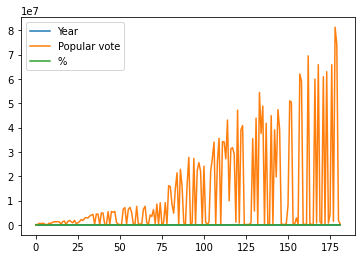

In [9]:
data.plot();

In [10]:
data.columns

Index(['Year', 'Candidate', 'Party', 'Popular vote', 'Result', '%'], dtype='object')

In [11]:
data[['Party','Popular vote']].max()

Party               Whig
Popular vote    81268924
dtype: object

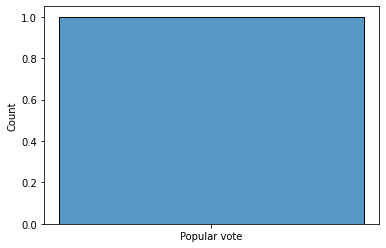

In [12]:
sns.histplot(data='Popular vote');

In [13]:
data.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [14]:
x = data[['Party','Popular vote','Result']]
y = data['%']


In [15]:
x

,Party,Popular vote,Result
0,Democratic-Republican,151271,loss
1,Democratic-Republican,113142,win
2,Democratic,642806,win
3,National Republican,500897,loss
4,Democratic,702735,win
...,...,...,...
177,Green,1457226,loss
178,Democratic,81268924,win
179,Republican,74216154,loss
180,Libertarian,1865724,loss


In [16]:
x.dtypes

Party           object
Popular vote     int64
Result          object
dtype: object

In [17]:
x[['Party']].value_counts()

Party                
Democratic               47
Republican               41
Libertarian              12
Prohibition              11
Socialist                10
Green                     7
Whig                      6
Independent               6
Progressive               4
Constitution              3
Populist                  3
American Independent      3
Reform                    2
National Republican       2
American                  2
Free Soil                 2
Democratic-Republican     2
Greenback                 1
Citizens                  1
Union Labor               1
Union                     1
Taxpayers                 1
States' Rights            1
Southern Democratic       1
Anti-Masonic              1
Anti-Monopoly             1
Constitutional Union      1
Communist                 1
Liberal Republican        1
Northern Democratic       1
New Alliance              1
Natural Law               1
National Union            1
Dixiecrat                 1
Farmer–Labor              

In [18]:
x[['Result']].value_counts()

Result
loss      132
win        50
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
print(x_train.shape,y_train.shape)

(136, 3) (136,)


In [22]:
print(x_test.shape,y_test.shape)

(46, 3) (46,)


In [23]:
x_train

,Party,Popular vote,Result
117,Republican,31783783,win
38,Anti-Monopoly,134294,loss
118,Democratic,29173222,loss
150,Reform,8085294,loss
75,Prohibition,188787,loss
...,...,...,...
106,Republican,34075529,win
14,Democratic,1223460,loss
92,Socialist,187910,loss
179,Republican,74216154,loss


In [24]:
y_train

117    43.565246
38      1.335838
118    37.670670
150     8.408844
75      0.708351
         ...    
106    55.325173
14     42.552229
92      0.412876
179    46.858542
102     0.286312
Name: %, Length: 136, dtype: float64

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = LogisticRegression()
model1 = DecisionTreeClassifier()

In [29]:
data[['Popular vote','%']].corr()

,Popular vote,%
Popular vote,1.000000,0.559061
%,0.559061,1.000000


In [30]:

data['Year']


0      1824
1      1824
2      1828
3      1828
4      1832
       ... 
177    2016
178    2020
179    2020
180    2020
181    2020
Name: Year, Length: 182, dtype: int64

In [31]:
data

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979


In [32]:
data['Candidate']

0         Andrew Jackson
1      John Quincy Adams
2         Andrew Jackson
3      John Quincy Adams
4         Andrew Jackson
             ...        
177           Jill Stein
178         Joseph Biden
179         Donald Trump
180         Jo Jorgensen
181       Howard Hawkins
Name: Candidate, Length: 182, dtype: object

In [33]:
data['Candidate'].max()

'Zachary Taylor'

In [39]:
data['Popular vote'].isnull().sum()

0

In [40]:
data['Result']

0      loss
1       win
2       win
3      loss
4       win
       ... 
177    loss
178     win
179    loss
180    loss
181    loss
Name: Result, Length: 182, dtype: object

In [45]:
data

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979


<Axes: >

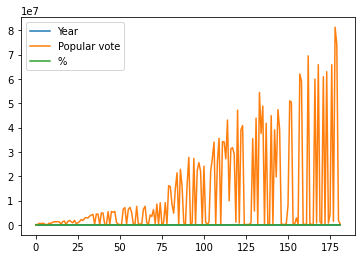

In [46]:
data.plot()

In [47]:
data.duplicated().sum()

0

In [48]:
df= pd.DataFrame({
    "Name":["Daud","Watson"],
    "AG NO":[6529,6552]
})

In [49]:
df

,Name,AG NO
0,Daud,6529
1,Watson,6552


In [50]:
df.mean()

TypeError: Could not convert ['DaudWatson'] to numeric